### Simulated annealing  

#### Import libraries  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize

#### Definition of function to be optimized  

In [2]:
def f(x):
    return x**4-8*x**2+4*x

#### Plot a graph of f(x)  

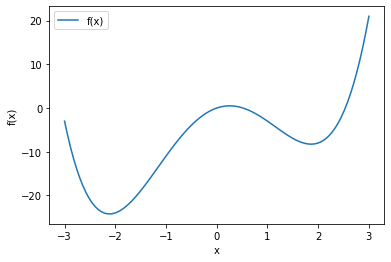

In [3]:
X = np.linspace(-3, 3, 100)
Y = f(X)
plt.plot(X, Y, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

#### Simulated annealing  

In [4]:
from random import random

def simulated_annealing(func, n_steps=1500, x0=0.0, xstep=0.5,
                        T0=100.0, Tcool=0.995):
    traj_x, traj_e, traj_temp = [], [], []
    prev_x, prev_e, temp = x0, func(x0), T0
    traj_x.append(prev_x)
    traj_e.append(prev_e)
    traj_temp.append(temp)
    for i in range(n_steps):
        dx = 2.0*(random()-0.5)*xstep
        e = func(prev_x+dx)
        dc = e - prev_e
        if dc < 0.0 or random() < np.exp(-dc/temp):  # accepted
            prev_x += dx
            prev_e = e
        traj_x.append(prev_x)
        traj_e.append(prev_e)
        traj_temp.append(temp)
        temp *= Tcool
    return (prev_x,traj_x,traj_e,traj_temp)

x_end,traj_x,traj_e,traj_temp = simulated_annealing(f, x0=1.0)
print(x_end, f(x_end))

1.7826732200635502 -8.193497856811003


#### Temperature  

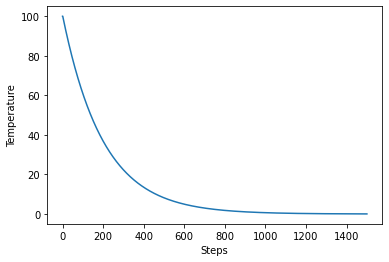

In [5]:
X = np.arange(len(traj_temp))
plt.plot(X,traj_temp,label='Temperature')
plt.xlabel('Steps')
plt.ylabel('Temperature')
plt.show()

#### Trajectories  
Initial value dependence is smaller than the methods of local minimization.  
However, because SA is stochastic, there are cases where  
the solution is trapped by a shallow valley,  
so we should run SA multiple times and get the best results among them.  

x0: -2.0  x_end: -2.1133287449660862


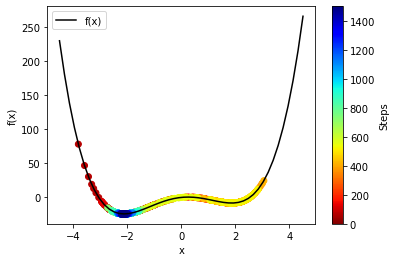

x0: -1.0  x_end: 1.8161819919737483


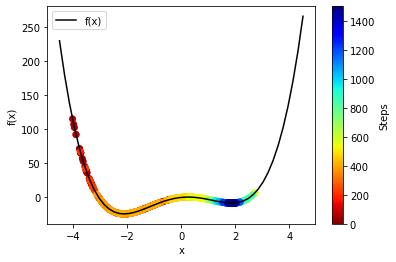

x0: 0.0  x_end: 1.8884610073380284


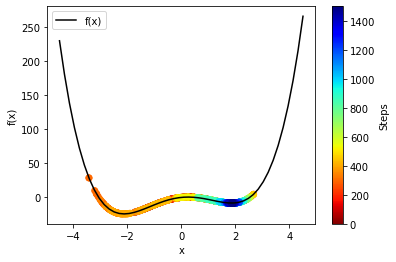

x0: 1.0  x_end: -2.08181759363284


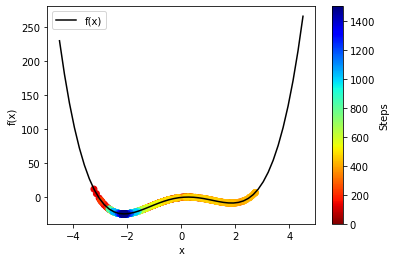

x0: 2.0  x_end: -2.103796221810165


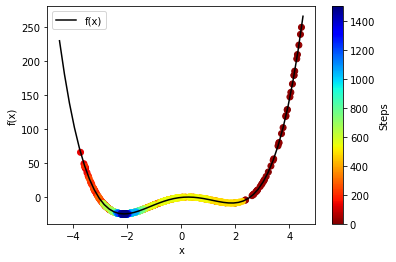

In [6]:
np.random.seed(11)
n_trial = 5
x_min = -4.5
x_max = 4.5
for i in range(n_trial):
    x0 = float(i-2)
    x_end,traj_x,traj_e,traj_temp = simulated_annealing(f, x0=x0)
    print('x0:', x0, ' x_end:', x_end)
    X = np.linspace(x_min, x_max)
    Y = f(X)
    plt.plot(X, Y, label='f(x)', color='black')
    c = np.arange(len(traj_x))
    plt.scatter(traj_x, traj_e, marker='o', linewidth=1, c=c, cmap=cm.jet_r)
    ax=plt.colorbar()
    ax.set_label('Steps')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()